Implemented by Aaya Bougrine and Henrik Albers

In [22]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf


# Preprocessing data

In [23]:
seed = 42
# Reading data 
data = pd.read_csv("./breast-cancer.txt", sep=",")
print(data.head())

# Dropping missing or non numeric values
nan_rows = data.isna().any(axis=1)
print("Count of missing data: " + str(nan_rows.value_counts()))

# Identifying and removing non numeric data
print(data.info())
data = data.drop("bare_nuclei", axis=1)

# Drop id column
data = data.drop("id", axis=1)

# Create feature and label arrays
y = data["class"]
X = data.drop("class", axis=1)

# Scaling feature matrix
sc = StandardScaler()
X = sc.fit_transform(X)

# Transforming feature vector into bool
y = y.replace({2:False, 4:True})

# Dividing data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

        id  clump_thickness  uniform_cell_size  uniform_cell_shape  \
0  1000025                5                  1                   1   
1  1002945                5                  4                   4   
2  1015425                3                  1                   1   
3  1016277                6                  8                   8   
4  1017023                4                  1                   1   

   marginal_adhesion  single_epi_cell_size bare_nuclei  bland_chromation  \
0                  1                     2           1                 3   
1                  5                     7          10                 3   
2                  1                     2           2                 3   
3                  1                     3           4                 3   
4                  3                     2           1                 3   

   normal_nucleoli  mitoses  class  
0                1        1      2  
1                2        1      2  
2          

# Creation of Neuronal Network

In [24]:
from tensorflow.keras.layers import Dense
def get_basic_model(count_nodes=5, count_layers=1, dropout=-1, activation_fcn=None):
  model = tf.keras.Sequential()
  if not dropout == -1:
    model.add(tf.keras.layers.Dropout(dropout, input_shape=(8,)))
  for i in range(0,count_layers):
    model.add(Dense(count_nodes, input_shape=(8,), activation=activation_fcn))
  model.add(Dense(1))
    

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model


# Comapring count of nodes for single hidden layer
<img src="WandB_Chart_22-9-2023_14-10-33.png" alt="Loss" />
<br>
In the picture you can see that 5 Nodes lead to a high loss at the beginning and continuing having a worse loss than the networks with more nodes. This is accompanied by the following training accuracy. In the following picture you can see the networks with few nodes (5) and the ones with many (25, 30) starting with a worse training accuracy. While it decreases fast for the larger networks it stays worse for the small network with five nodes.
<img src="WandB_Chart_22-9-2023_14-10-33-acc.png" alt="Accuracy" />

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: halbers (ba-halbers). Use `wandb login --relogin` to force relogin


Iteration: 5:
5/5 [==============================] - 0s 2ms/step
Iteration: 10:
5/5 [==============================] - 0s 1ms/step
Iteration: 15:
5/5 [==============================] - 0s 3ms/step
Iteration: 20:
5/5 [==============================] - 0s 2ms/step
Iteration: 25:
5/5 [==============================] - 0s 2ms/step
Iteration: 30:
5/5 [==============================] - 0s 1ms/step


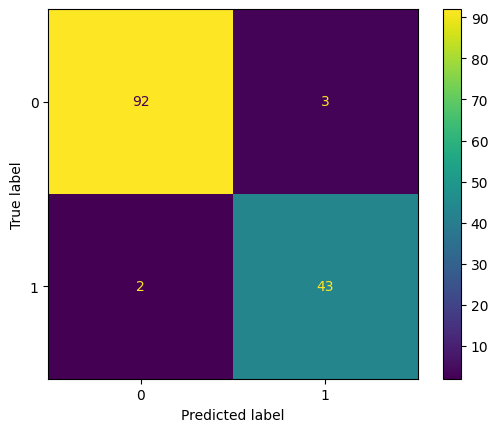

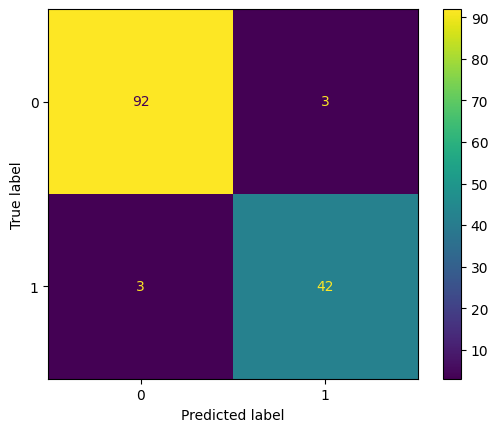

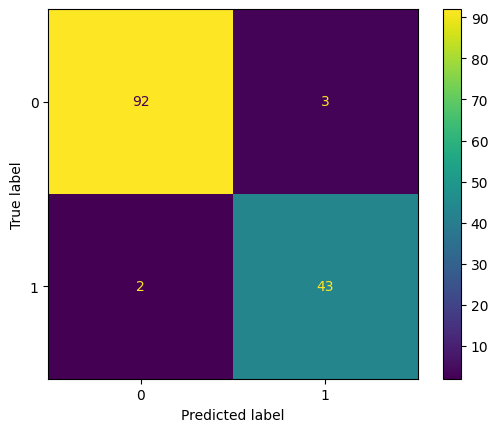

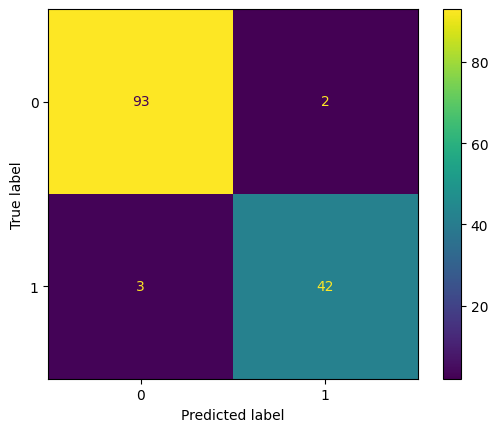

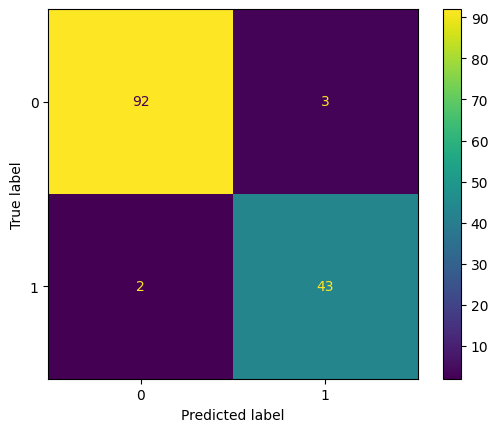

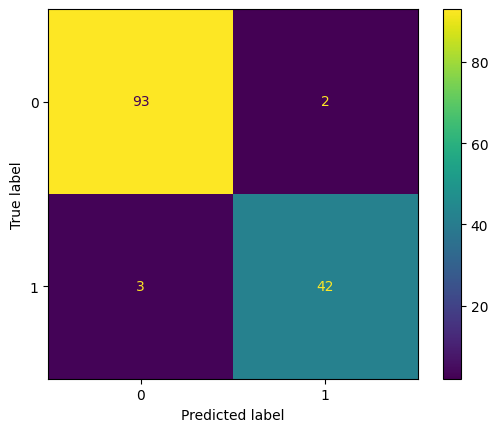

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import wandb
from wandb.keras import WandbMetricsLogger
wandb.login()
def to_bool(x):
    if x>=0:
        return True
    return False

y_test = y_test.reset_index(drop=True)

for i in range(5,31,5):
    print(f"Iteration: {i}:")
    # wandb.init(project='test-tumor-classification', name=f"One Layer, {i} Nodes")
    model = get_basic_model(count_nodes=i)
    model.fit(X_train, y_train, epochs=15, batch_size=16, verbose=0) #, validation_data=(X_test, y_test), callbacks=[WandbMetricsLogger()])
    predictions = model.predict(X_test)
    predictions = np.apply_along_axis(to_bool,axis=1, arr=predictions)
    cm_ens = confusion_matrix(y_true=y_test, y_pred=predictions)
    disp_ens = ConfusionMatrixDisplay(cm_ens)
    disp_ens.plot()
    # wandb.finish()

# Evaluating count of hidden layers
Node size is determined by accuracy on training set
<img src="layers_loss.png" alt="Loss" />

<img src="layers_acc.png" alt="Accuracy" />

Iteration: 5:


epoch/accuracy,▁▄▅▆▇▇▇████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▆▄▃▃▂▂▂▁▁▁▁▁▁▁
epoch/val_accuracy,▁▄▅▅▆▆▆▇▇▇▇████
epoch/val_loss,█▆▅▄▃▂▂▂▂▁▁▁▁▁▁
epoch/accuracy,0.9517
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.13398
epoch/val_accuracy,0.94286


Iteration: 10:


epoch/accuracy,▁▅▆▇▇▇█████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▅▃▃▂▂▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▅▆▇███████████
epoch/val_loss,█▅▄▃▂▂▂▂▁▁▁▁▁▁▁
epoch/accuracy,0.94991
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.12588
epoch/val_accuracy,0.94286


Iteration: 15:


epoch/accuracy,▁▇█████████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▆▆████████████
epoch/val_loss,█▄▃▂▂▂▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.94991
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.1121
epoch/val_accuracy,0.95


Iteration: 20:


epoch/accuracy,▁▅▇▇▇██████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▁▁▁▃▃▃▆▆▆▆▆███
epoch/val_loss,█▄▃▂▂▂▂▁▁▁▁▁▁▁▁
epoch/accuracy,0.95349
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11325
epoch/val_accuracy,0.95714


Iteration: 25:


epoch/accuracy,▁▆▇▇▇▇█████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▄▂▂▂▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▇▇▇▇▇▇▇███████
epoch/val_loss,█▄▃▂▂▂▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.95349
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11395
epoch/val_accuracy,0.95


Iteration: 30:


epoch/accuracy,▁▆▇▇█████████▇▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,█▁▁████████████
epoch/val_loss,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁
best_node_cnt,"Layer: 1, Nodes: 20"
epoch/accuracy,0.9517
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.10919


5/5 [==============================] - 0s 2ms/step


Iteration: 5:


epoch/accuracy,▁▅▆▇▇██████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▅▃▂▂▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▄▆▆▆▆█████████
epoch/val_loss,█▅▄▃▂▂▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.94991
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11235
epoch/val_accuracy,0.96429


Iteration: 10:


epoch/accuracy,▁▅▇▇████▇██▇▇▇▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▄▃▂▂▂▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▃▄▆▇█▇▇▇▇▇▇▆▇▆
epoch/val_loss,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.9517
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.10928
epoch/val_accuracy,0.95714


Iteration: 15:


epoch/accuracy,▁▇▇███████████▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▁██████▁▁▁█▁█▁
epoch/val_loss,█▄▃▂▂▂▂▁▁▁▁▁▁▁▁
epoch/accuracy,0.94633
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.10896
epoch/val_accuracy,0.95


Iteration: 20:


epoch/accuracy,▁▇▇████████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▅▅▇▇▇███▇▆▆▆▆▆
epoch/val_loss,█▄▃▂▂▂▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.9517
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.109
epoch/val_accuracy,0.95


Iteration: 25:


epoch/accuracy,▁██████▇▇█▇▇▇▅▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,█▁█████████████
epoch/val_loss,█▃▂▁▁▁▁▁▁▁▁▁▂▁▁
epoch/accuracy,0.95349
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.10991
epoch/val_accuracy,0.95714


Iteration: 30:


epoch/accuracy,▁▇██▇▇▆▇▆▆▆▆▇▆▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▄█▄▄▄▁▁▁▁▁▁▁▁▁▁
epoch/val_loss,█▃▂▂▂▂▁▁▁▁▁▁▁▁▁
best_node_cnt,"Layer: 2, Nodes: 5"
epoch/accuracy,0.94991
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.10889


5/5 [==============================] - 0s 2ms/step


Iteration: 5:


epoch/accuracy,▁▄▆▇███████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▅▄▃▂▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▄▅▇███████████
epoch/val_loss,█▆▄▃▂▂▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.95349
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11254
epoch/val_accuracy,0.95714


Iteration: 10:


epoch/accuracy,▁▇▇▇▇▇▇▇▇▇▇▇▇▇█
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▄▅▇▇▇█████▅▅▅▅
epoch/val_loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.95528
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.10804
epoch/val_accuracy,0.95


Iteration: 15:


epoch/accuracy,▁█▇▇▆█▆▄▄▅▅▅▅▆▅
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▅▅███▁▁▅▅▅▅▅█▅▅
epoch/val_loss,█▄▃▂▂▂▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.94812
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.1079
epoch/val_accuracy,0.95


Iteration: 20:


epoch/accuracy,▁█▆▆▅▅▆▄▅▅▅▅▅▄▄
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,███▄▁█▁▁▁▄▁▁▁▁▁
epoch/val_loss,█▃▂▂▂▁▂▂▂▁▁▁▁▂▁
epoch/accuracy,0.94454
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.1082
epoch/val_accuracy,0.95


Iteration: 25:


epoch/accuracy,▁█▇█▆▆▆▆▆▆▆█▆▆▆
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,███▄▁▁▄▁▁▄▁▄▁▄▁
epoch/val_loss,█▂▂▁▂▂▃▃▂▃▂▃▂▄▃
epoch/accuracy,0.94633
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11159
epoch/val_accuracy,0.95


Iteration: 30:


epoch/accuracy,▁█▇▇▆▆▇▆▆▆▇▆▆▆▆
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▄▄█▁▁▁▄▄▄▁▄▁▁▁▁
epoch/val_loss,█▄▃▂▁▂▁▃▂▂▄▂▃▂▄
best_node_cnt,"Layer: 3, Nodes: 5"
epoch/accuracy,0.94812
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.10975


5/5 [==============================] - 0s 2ms/step


Iteration: 5:


epoch/accuracy,▁▅▇████████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▄▄▄▅▅▆▆▆▇▇▇▇██
epoch/val_loss,█▄▂▂▂▂▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.94991
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11377
epoch/val_accuracy,0.95714


Iteration: 10:


epoch/accuracy,▁▆█████████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▅▇███▇██▇█████
epoch/val_loss,█▃▂▂▂▁▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.94812
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.10843
epoch/val_accuracy,0.95


Iteration: 15:


epoch/accuracy,▁█████████▇▇▇▇▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▄███▄▁▁▁▁▁▁▁▁▄
epoch/val_loss,█▃▂▂▁▂▂▁▁▂▁▁▂▁▂
epoch/accuracy,0.94633
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.10871
epoch/val_accuracy,0.95714


Iteration: 20:


epoch/accuracy,▁▇██▆▇▅▆▅▅▆▆▅▇▆
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,█▆▆▃▁▆▁▃▃▁▃▁▃▁▃
epoch/val_loss,▂▂▃▅▆▂█▄▅▃▆▄▇▁▅
epoch/accuracy,0.94812
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11008
epoch/val_accuracy,0.95714


Iteration: 25:


epoch/accuracy,▁██████████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▅▁▅▅▅▅▅▅▅███▅▅▅
epoch/val_loss,█▃▂▁▃▂▃▂▂▂▃▃▂▂▃
epoch/accuracy,0.9517
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.10899
epoch/val_accuracy,0.95


Iteration: 30:


epoch/accuracy,▁█▇▇▆▇▆▅▁▇▅▅▅▂▃
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▂▁▁▂▂▁▁▁▁▁▁
epoch/val_accuracy,█▆▃▁▁▁▁▃▁▁▃▁▃▁▁
epoch/val_loss,▂▁▂▂▄▅▅▂▄▂▇▅█▃▇
best_node_cnt,"Layer: 4, Nodes: 5"
epoch/accuracy,0.94633
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11317


5/5 [==============================] - 0s 2ms/step


Iteration: 5:


epoch/accuracy,▁▄▆▇███████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▄▂▂▂▂▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▃▅▅▆▇▆▇▇██████
epoch/val_loss,█▅▄▃▃▂▂▂▂▁▁▁▁▁▁
epoch/accuracy,0.95707
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.12161
epoch/val_accuracy,0.94286


Iteration: 10:


epoch/accuracy,▁▅▇▇▇▇▇██▇▇▇▇█▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▃█▆█▆▆▆█▃▆▃▃▃▃
epoch/val_loss,█▃▂▂▁▁▁▁▁▂▁▁▂▂▂
epoch/accuracy,0.9517
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.10901
epoch/val_accuracy,0.95


Iteration: 15:


epoch/accuracy,▁██████████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▆█▆▆▆▆▃▆▃▃▆▃█▃
epoch/val_loss,█▄▂▂▂▂▂▂▁▃▂▂▃▁▃
epoch/accuracy,0.95528
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.1077
epoch/val_accuracy,0.95


Iteration: 20:


epoch/accuracy,▁█▇▇▇▆▇▇▇▇▇█▆▆▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,██▁▁▁▁▁▁▁▁████▁
epoch/val_loss,█▃▃▁▄▁▁▂▂▂▄▄▂▃▄
epoch/accuracy,0.94991
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11279
epoch/val_accuracy,0.95


Iteration: 25:


epoch/accuracy,▁██████████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,█▃▃▃▃▆▃▃▁▁▆▁▁▁▁
epoch/val_loss,▇▃▄▆▆▂▅▆▁█▂▆▅▅▆
epoch/accuracy,0.94812
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.10944
epoch/val_accuracy,0.95


Iteration: 30:


epoch/accuracy,▁▄▇▅██▅▇▆▆▆▅▆▅▅
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▂▂▂▁▁▂▁▂▁▁
epoch/val_accuracy,███▁▁█▁▁███▁███
epoch/val_loss,▅▁█▅▇▇▃▇▆▆▅▇█▆▆
best_node_cnt,"Layer: 5, Nodes: 30"
epoch/accuracy,0.94633
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11198


5/5 [==============================] - 0s 861us/step


Iteration: 5:


epoch/accuracy,▁▅▅▇▇▇▇▇▇█▇████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▂▇▇▇▇█████████
epoch/val_loss,█▄▃▃▃▂▂▂▁▁▁▁▁▁▁
epoch/accuracy,0.95707
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11347
epoch/val_accuracy,0.95714


Iteration: 10:


epoch/accuracy,▁▅▇████████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▄▃▂▂▂▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▂▄▅▆▆▆▇▇▆▇▇█▇▇
epoch/val_loss,█▅▄▃▂▂▂▁▁▁▁▁▁▁▁
epoch/accuracy,0.94991
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11094
epoch/val_accuracy,0.95714


Iteration: 15:


epoch/accuracy,▁▅▆▆▅▆▆▇█▆▇▆▅▇▆
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▂▂▂▂▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▁█▄▄▄▄▄▄▁▁▄▄▁▄
epoch/val_loss,█▄▃▂▁▁▂▂▁▂▁▁▁▂▁
epoch/accuracy,0.94991
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11103
epoch/val_accuracy,0.95714


Iteration: 20:


epoch/accuracy,▁█▇█▇▇▇██▇█▇▇▇▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,██▄▄▄▄█▄▁▁▄▄█▁▁
epoch/val_loss,▇▇▃▄▃▆▁▃▆█▂▃▃█▇
epoch/accuracy,0.94812
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11112
epoch/val_accuracy,0.95


Iteration: 25:


epoch/accuracy,▁██▇█▇▆▇▇▇█▆▇▆▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,██▆▄▆▁▄▄▄▄▆▄▆▆▄
epoch/val_loss,▁▃▂▇▃█▄▄▅▄▇▄▅▆▄
epoch/accuracy,0.94812
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11153
epoch/val_accuracy,0.95


Iteration: 30:


epoch/accuracy,▁▇█▆█▇██▇█▇▇▇▇█
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▂▁▁▁▁▁▂▁▁▁▁▁
epoch/val_accuracy,▁▁▁▄▄▄▁█▄▁▁▄▄▁▁
epoch/val_loss,█▇█▄▅▄▆▁▂▄▃▁▁▂▃
best_node_cnt,"Layer: 6, Nodes: 5"
epoch/accuracy,0.94991
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11156


5/5 [==============================] - 0s 1ms/step


Iteration: 5:


epoch/accuracy,▁▄▇███████▇██▇▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▂▃▅▆▆▇██▆▆▇▇▆▆
epoch/val_loss,█▅▃▂▂▁▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.94633
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.10939
epoch/val_accuracy,0.95


Iteration: 10:


epoch/accuracy,▁▇█████████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▃▃█▇▆▆▆▆▆▆▆▅▅▅
epoch/val_loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.94633
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11309
epoch/val_accuracy,0.95


Iteration: 15:


epoch/accuracy,▁█████████▇████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁██▁▁▁▁▁█████▁█
epoch/val_loss,▁▂▆▅▄▄▁▅▃▄▄█▄▄▆
epoch/accuracy,0.9517
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11291
epoch/val_accuracy,0.95714


Iteration: 20:


epoch/accuracy,▁▆▆▆█▃▄▆▅▇▇▅▂█▄
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▂▂▂▂▂▂▂▂▁▁▁▁
epoch/val_accuracy,██▁▆▃▃▆▆▃▃▆▃▃▃▃
epoch/val_loss,▃▃█▃▂▄▂▁▃▃▄▅▄▂▄
epoch/accuracy,0.94633
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11
epoch/val_accuracy,0.95


Iteration: 25:


epoch/accuracy,▅▁▂▅▁▂▁▂▂▂▂▁▁█▅
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▂▂▁▂▁▁▁▁▁▁▂▁
epoch/val_accuracy,▃▆▆█▃▃▁█▃▃▆▆▃▃▃
epoch/val_loss,█▅▃▅▃▂▄▂▁▂▃▃▁▃▁
epoch/accuracy,0.9517
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.1107
epoch/val_accuracy,0.95


Iteration: 30:


epoch/accuracy,▁█▇▇▇▇▇▇▇█▇█▇▇▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,█▄▁▄▄▄▄▄▁▁▁▄▄▁▄
epoch/val_loss,▅▄▃▅▄▆█▁▃▂▇▇▆▃▆
best_node_cnt,"Layer: 7, Nodes: 15"
epoch/accuracy,0.94812
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11243


5/5 [==============================] - 0s 1ms/step


Iteration: 5:


epoch/accuracy,▁▇█████████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▅▇▇███████████
epoch/val_loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.95349
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.12041
epoch/val_accuracy,0.95714


Iteration: 10:


epoch/accuracy,▁▇█████████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▆▇▇▇▇▆▇█▇▇█▇▆▆
epoch/val_loss,█▄▃▃▂▂▂▂▁▁▁▁▁▁▁
epoch/accuracy,0.94812
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.1104
epoch/val_accuracy,0.95


Iteration: 15:


epoch/accuracy,▁█▇▇█▇█▇▇██▇█▇▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▆██▆▆▆▃▁▆▆▆▆▃▃▃
epoch/val_loss,█▅▃▃▂▂▁▂▁▁▁▁▂▁▁
epoch/accuracy,0.9517
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11038
epoch/val_accuracy,0.95


Iteration: 20:


epoch/accuracy,▁█▇▇██▇█▇█▇█▇▇█
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▃▃▃▃▆▃▆▁▆▁▆▆▃█▃
epoch/val_loss,█▅▃▃▃▃▁▃▁▄▁▂▂▁▂
epoch/accuracy,0.94991
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.1144
epoch/val_accuracy,0.95


Iteration: 25:


epoch/accuracy,▁█▆▆▇▇█▇▆▆▅▇█▆▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▃▆█▃▆▃▃▆▁▃▆▆▃▃▆
epoch/val_loss,█▂▁▂▂▂▂▂▁▁▂▄▄▃▂
epoch/accuracy,0.94812
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.1138
epoch/val_accuracy,0.95714


Iteration: 30:


epoch/accuracy,▂▂█▂▅▆█▁▅▃▃▆▂▇▆
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▂▂▂▂▂▂▁▁▁▂▁▂
epoch/val_accuracy,█▁▄▄▄▁▁▁▁▁▄█▁▄▄
epoch/val_loss,▃▄█▄▂▅▄▁▃▁▅▃▁▄▅
best_node_cnt,"Layer: 8, Nodes: 5"
epoch/accuracy,0.9517
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11628


5/5 [==============================] - 0s 2ms/step


Iteration: 5:


epoch/accuracy,▁▅▆▇▇▇▇▇▇▇▇▇███
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▄▃▂▂▂▂▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▃▅▆▆█▇▇▇▇▇▇▇▇▇
epoch/val_loss,█▅▃▂▂▂▂▁▁▁▁▁▁▁▁
epoch/accuracy,0.94812
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.12312
epoch/val_accuracy,0.95


Iteration: 10:


epoch/accuracy,▁██████████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▃▃▃▆█▆▆█▆▆▆▆▆▆
epoch/val_loss,█▂▂▂▂▁▁▁▁▂▁▂▁▂▁
epoch/accuracy,0.95349
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11119
epoch/val_accuracy,0.95714


Iteration: 15:


epoch/accuracy,▁▇▇█▇▇█▇█▇██▇▇▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▃█▆█▁█▁▆▁▃▆▁▁▃
epoch/val_loss,█▄▂▃▂▄▁▃▃▃▂▃▃▃▁
epoch/accuracy,0.94812
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11097
epoch/val_accuracy,0.95


Iteration: 20:


epoch/accuracy,▁▇█▇▇█▇▆▆▇█▇▇▇▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,█▁▃▃▁▃▃▄▃▄▃▃▄▃▃
epoch/val_loss,▅▅██▂▆▂▆▂▁▅▁▂▂▂
epoch/accuracy,0.94812
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11104
epoch/val_accuracy,0.95


Iteration: 25:


epoch/accuracy,▂▇▄▇▆▂▄▆▅▄█▁▅▅▅
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▁▃▂▂▂▁▁▁▁▁▁▁▁
epoch/val_accuracy,▃▁▃▁█▆▃▆▆▃▆▃▃▃▃
epoch/val_loss,█▇▄▆▅▂▁▅▁▃▃▂▁▂▂
epoch/accuracy,0.94812
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11593
epoch/val_accuracy,0.95


Iteration: 30:


epoch/accuracy,▁▆▇▆▇▅▅█▅▇▇▅▆▅▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▂▂▁▁▁▁▁▁▁▁▁▂
epoch/val_accuracy,▄▄█▁▄▄█▁▄▄▄▄▄▁▁
epoch/val_loss,▆▁▂▂▅▂▃▆▃▄▄▂▄▄█
best_node_cnt,"Layer: 9, Nodes: 10"
epoch/accuracy,0.94991
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.12007


5/5 [==============================] - 0s 952us/step


Iteration: 5:


epoch/accuracy,▁▇█▇███████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▆▁▁▁▁▃▃▆█▆█▆███
epoch/val_loss,█▂▂▂▂▂▂▁▁▁▁▁▁▁▁
epoch/accuracy,0.9517
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.1154
epoch/val_accuracy,0.96429


Iteration: 10:


epoch/accuracy,▁▇█████████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▃▃▄▄▃██▆█▄▄▆█▄
epoch/val_loss,█▅▄▃▂▂▂▂▁▁▃▂▂▁▁
epoch/accuracy,0.9517
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11054
epoch/val_accuracy,0.95


Iteration: 15:


epoch/accuracy,▁██▇▇▇▇████▇▇█▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▆▁▃▃▁▁▁▃▁█▁▁▁▃▃
epoch/val_loss,▁▄▇▇▆▃▅▃▂▂▅▃█▇▇
epoch/accuracy,0.94812
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11344
epoch/val_accuracy,0.95714


Iteration: 20:


epoch/accuracy,▁█▅▇▅▅▅▅▆▃▅▅▆▆▅
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▂▁▁▂▁▂▁▁▁▁▁▁
epoch/val_accuracy,▄█▁▄▁▁▄▄▁▁▁▄▁▄▄
epoch/val_loss,▆▁▁▁▂▂▁▁█▂▂▂▁▁▃
epoch/accuracy,0.94633
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11688
epoch/val_accuracy,0.95714


Iteration: 25:


epoch/accuracy,▁▆▆▇▆▇▇█▇█▇██▇▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▁▁▁▁▁▁▁▁▂▂▁▁
epoch/val_accuracy,██▅▅█▅████▅██▁█
epoch/val_loss,▂▃▃▂▂▂▃▅▁▂▃▄▅█▃
epoch/accuracy,0.94633
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.1157
epoch/val_accuracy,0.95714


Iteration: 30:


epoch/accuracy,▁▅▆▆▅▂█▅▄▆▅▅▅▅▅
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▂▁▂▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▄▄▄▁▁█▄▁▁▁▄▁█▁▁
epoch/val_loss,█▃▁▅▂▁▅▇▃▅▂▅▁▃▇
best_node_cnt,"Layer: 10, Nodes: 5"
epoch/accuracy,0.94633
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11512


5/5 [==============================] - 0s 840us/step
[0, 20, 5, 5, 5, 30, 5, 15, 5, 10, 5]


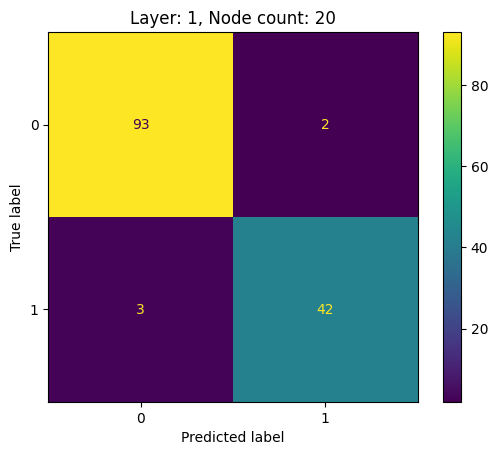

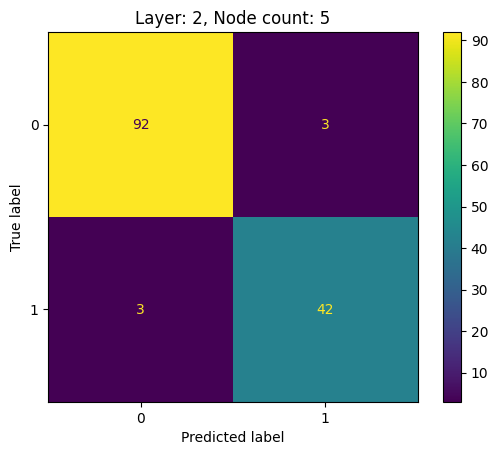

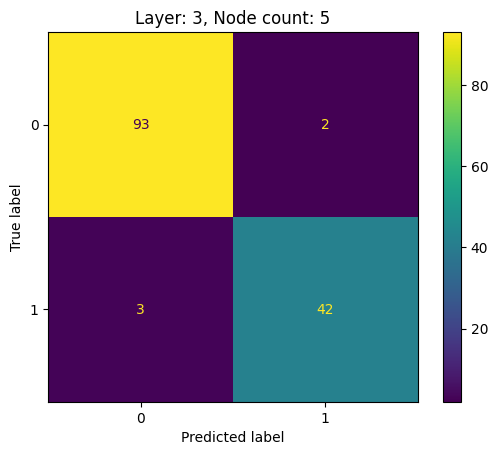

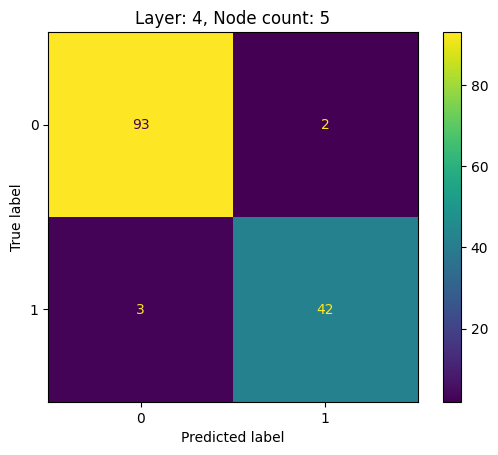

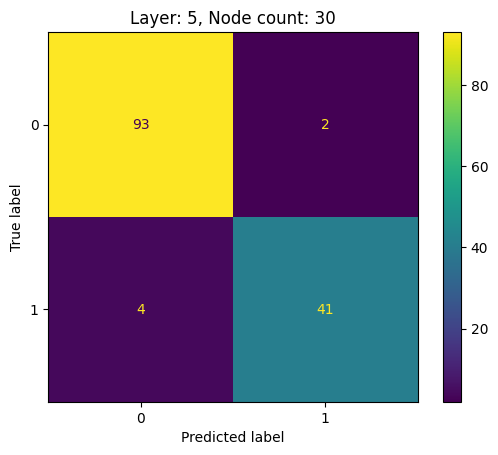

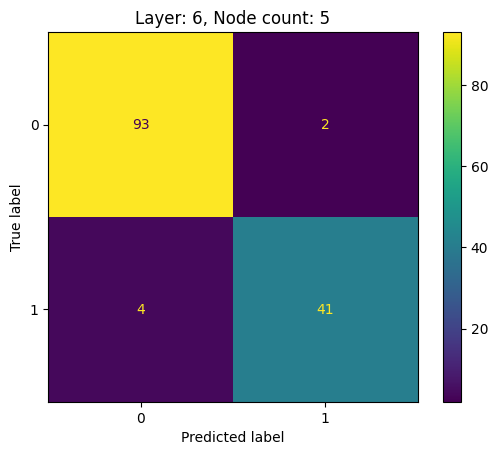

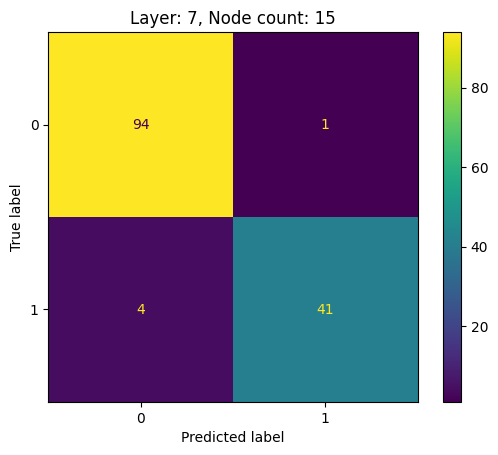

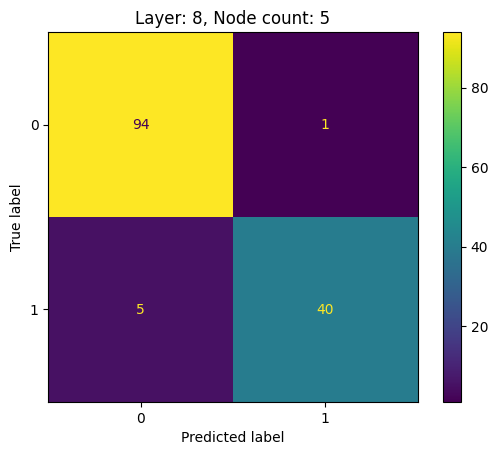

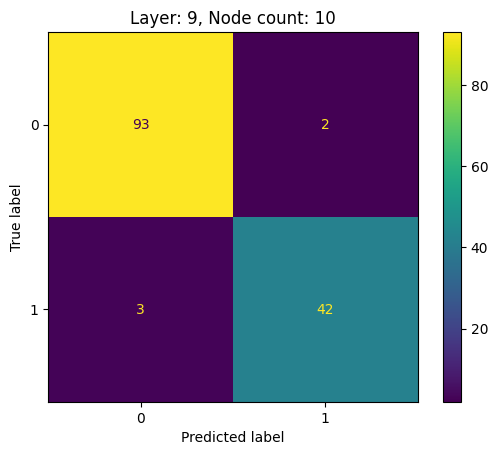

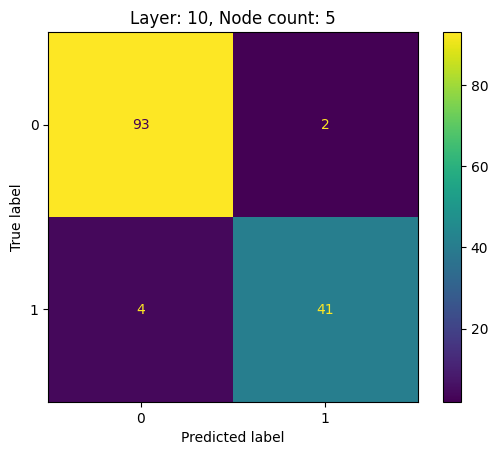

In [5]:
node_counts = [0 for x in range(1,12)]
plots = []
for layer in range(1,11):
    best_acc = 0
    best_model = None
    for i in range(5,31,5):
        # wandb.init(project='test-tumor-classification-2', name=f"{layer} Layer, {i} Nodes")
        print(f"Iteration: {i}:")
        model = get_basic_model(count_nodes=i, count_layers=layer)
        model.fit(X_train, y_train, epochs=15, batch_size=16, verbose=0) # , validation_data=(X_test, y_test), callbacks=[WandbMetricsLogger()])
        acc = model.get_metrics_result()["accuracy"]
        if best_acc<acc:
            node_counts[layer] = i
            best_acc = acc
            best_model = model
    # wandb.run.summary["best_node_cnt"] = f"Layer: {layer}, Nodes: {node_counts[layer]}"
    # wandb.finish()
    predictions = best_model.predict(X_test)
    predictions = np.apply_along_axis(to_bool,axis=1, arr=predictions)
    cm_ens = confusion_matrix(y_true=y_test, y_pred=predictions)
    disp_ens = ConfusionMatrixDisplay(cm_ens)
    disp_ens.plot()
    disp_ens.ax_.set_title(f"Layer: {layer}, Node count: {node_counts[layer]}")
    plots.append(disp_ens)
print(node_counts)

6.) <br>
The results on the test set are similar for the neural networks with the different layers and node counts.

[20, 5, 5, 5, 30, 5, 15, 5, 10, 5]


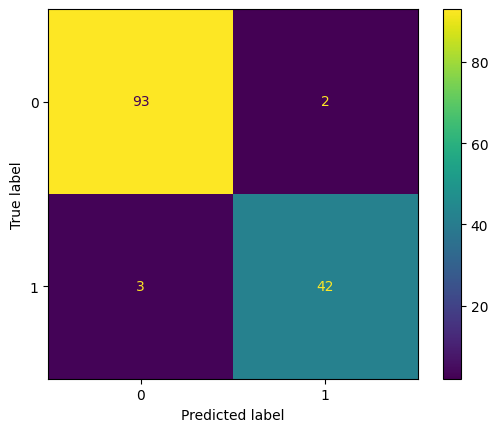

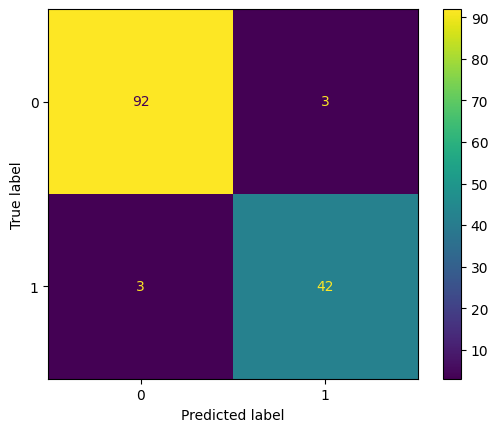

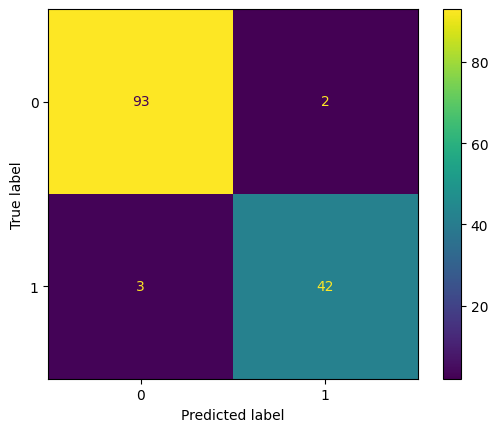

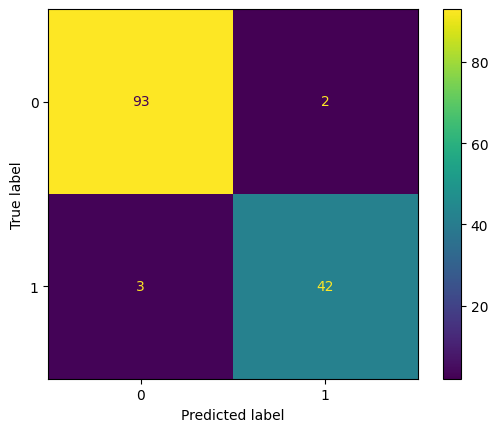

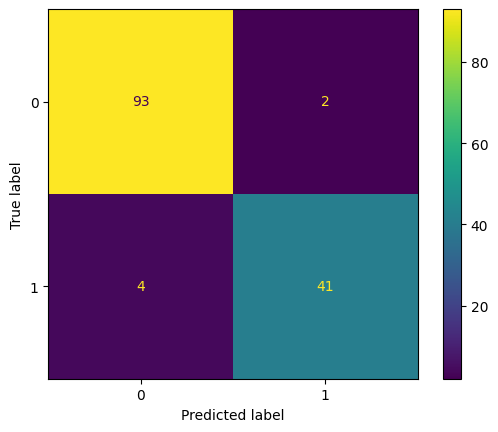

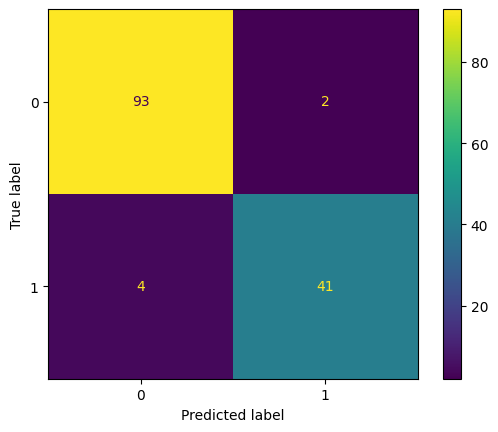

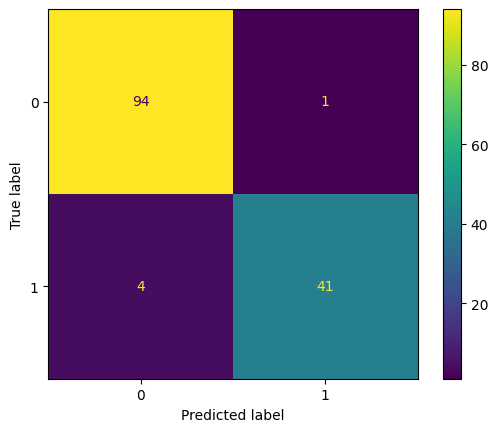

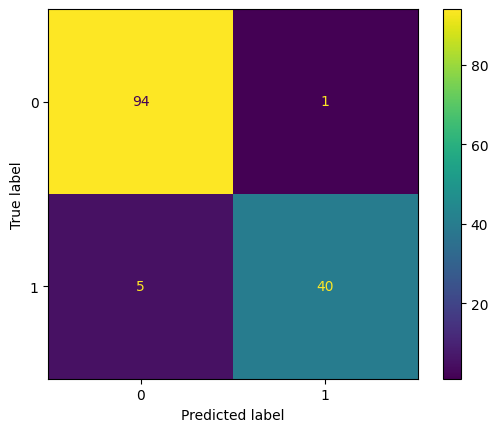

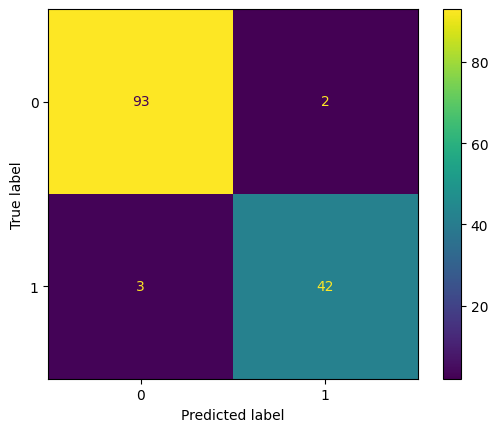

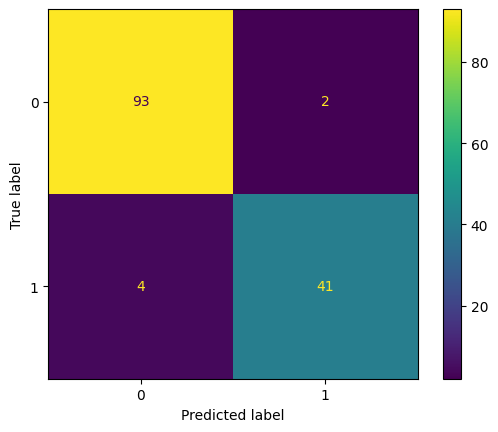

In [6]:
print(node_counts[1:])
for plot in plots:
    plot.plot()

# 7) Network with 4 hidden layers and 10 neurons incl. Drop-Out
<img src="do_loss.png" alt="Loss" />

<img src="do_acc.png" alt="Accuracy" />

epoch/accuracy,▁▆████▇▇▇█▇▇▇█▇
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▂▂▂▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▇▇▇▇███▇▇▇▆▆▆▆
epoch/val_loss,█▅▄▃▃▂▂▂▂▁▁▁▁▁▁
best_node_cnt,"Layer: 10, Nodes: 5"
epoch/accuracy,0.94812
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.1111


5/5 [==============================] - 0s 3ms/step


epoch/accuracy,▁██████████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▇▇█▇█▇▇▇▇▇▇▇▇▇
epoch/val_loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁
best_node_cnt,"Layer: 10, Nodes: 5"
epoch/accuracy,0.94454
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11439


5/5 [==============================] - 0s 1ms/step


epoch/accuracy,▁▇████▇████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▄▄▄▆▅▅▆▆▅▅█▇▇▆
epoch/val_loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁
best_node_cnt,"Layer: 10, Nodes: 5"
epoch/accuracy,0.94454
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.12704


5/5 [==============================] - 0s 1ms/step


epoch/accuracy,▂▃▂▆▁▅▃▆▅▆▄▅▆█▃
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▂▃▁▂▂▂▁▂▂▁▂▃
epoch/val_accuracy,▁▄▄▄▄██▄▄▄████▄
epoch/val_loss,█▆▅▃▃▂▂▂▂▂▂▁▁▁▁
best_node_cnt,"Layer: 10, Nodes: 5"
epoch/accuracy,0.93739
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.15408


5/5 [==============================] - 0s 1ms/step


epoch/accuracy,▁▇▆▇▆▆▇▇▇▇▇█▇▇█
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▁▂▃▁▂▂▁▂▁▂▂▁
epoch/val_accuracy,▆█▆▆▆▁█▃▃███▆█▃
epoch/val_loss,█▄▃▂▂▃▁▂▂▁▁▁▁▁▂
best_node_cnt,"Layer: 10, Nodes: 5"
epoch/accuracy,0.94633
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.13945


5/5 [==============================] - 0s 1ms/step


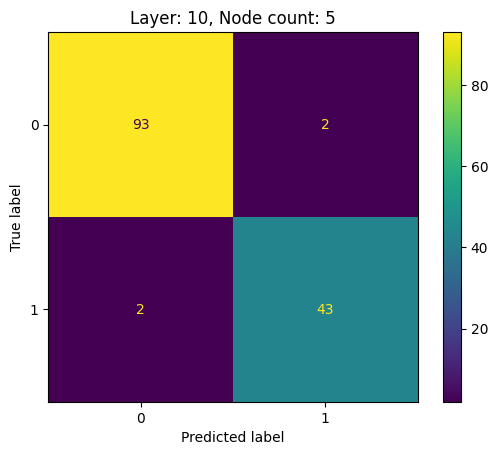

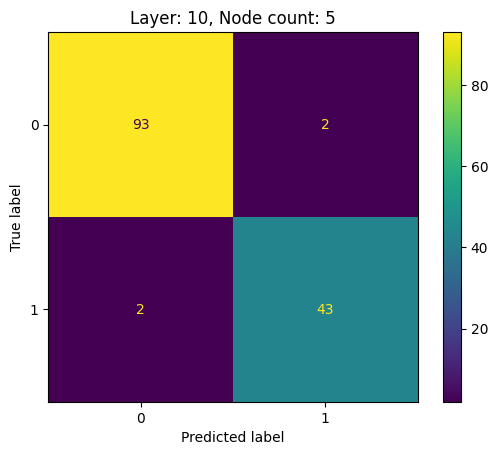

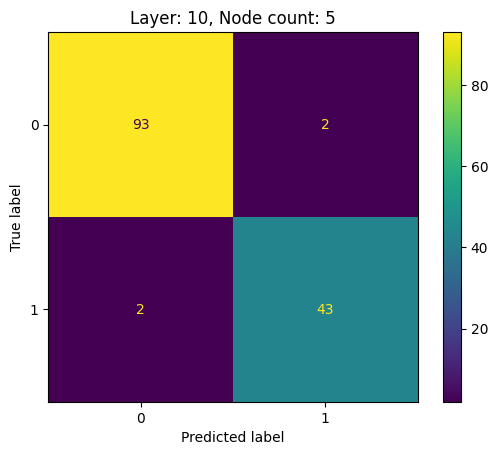

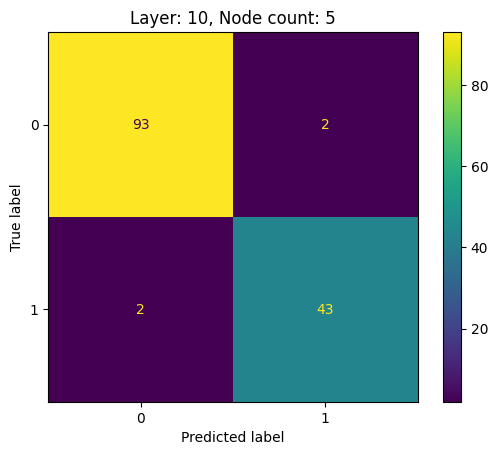

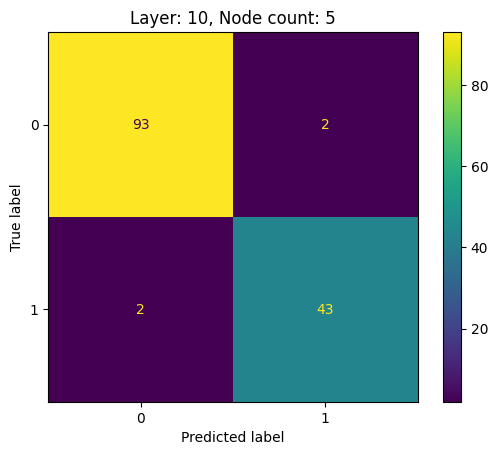

In [17]:
for i in range(0, 41, 10):
    dropout = i/100

    wandb.init(project='tumor-classification-3', name=f"4 Layer, 10 Nodes, Dropout:{dropout}")
    model = get_basic_model(count_nodes=10, count_layers=4, dropout=dropout)
    model.fit(X_train, y_train, epochs=15, batch_size=16, verbose=0, validation_data=(X_test, y_test), callbacks=[WandbMetricsLogger()])
    acc = model.get_metrics_result()["accuracy"]

    wandb.run.summary["best_node_cnt"] = f"Layer: {layer}, Nodes: {node_counts[layer]}"
    wandb.finish()
    predictions = model.predict(X_test)
    predictions = np.apply_along_axis(to_bool,axis=1, arr=predictions)
    cm_ens = confusion_matrix(y_true=y_test, y_pred=predictions)
    disp_ens = ConfusionMatrixDisplay(cm_ens)
    disp_ens.plot()
    disp_ens.ax_.set_title(f"Layer: {layer}, Node count: {node_counts[layer]}")


# Exploring the different activation functions 
<img src="acti_loss_1.png" alt="Loss" />

<img src="acti_acc_1.png" alt="Accuracy" />

epoch/accuracy,▁▁▁▁▁▁▁▁▁▄▆▇███
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▇▇▇▆▆▅▄▄▃▃▂▂▁▁
epoch/val_accuracy,▁▁▁▁▁▁▁▁▂▅▆▇███
epoch/val_loss,██▇▇▆▅▅▄▄▃▂▂▂▁▁
epoch/accuracy,0.93381
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.22504
epoch/val_accuracy,0.92143


5/5 [==============================] - 0s 3ms/step


epoch/accuracy,▁▅▆▇▇▇▇▇███████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▆▄▃▂▂▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▅▆▇▇██████████
epoch/val_loss,█▆▄▃▂▂▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.95886
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.10458
epoch/val_accuracy,0.97143


5/5 [==============================] - 0s 3ms/step


epoch/accuracy,▁▄▆▇▇██████████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▅▄▃▂▂▂▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▅▆▇▇▇█████████
epoch/val_loss,█▅▄▃▂▂▂▂▁▁▁▁▁▁▁
epoch/accuracy,0.95707
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.11863
epoch/val_accuracy,0.96429


5/5 [==============================] - 0s 1ms/step


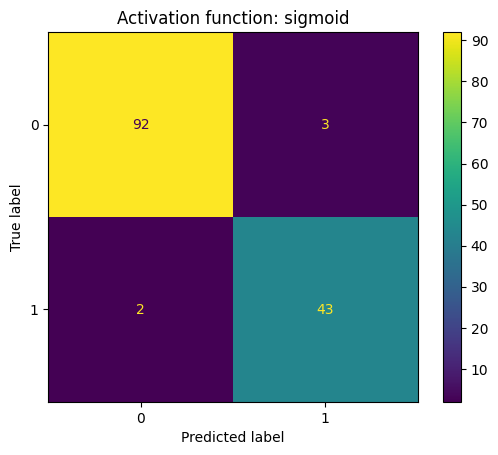

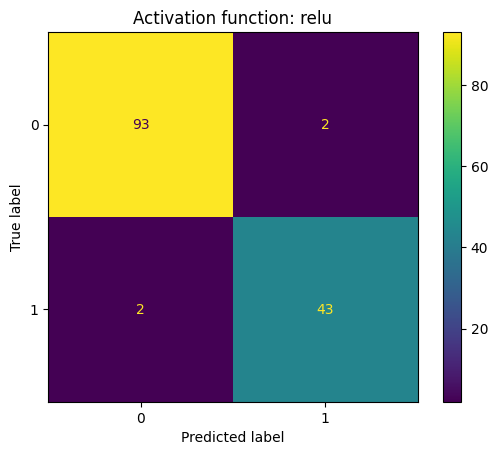

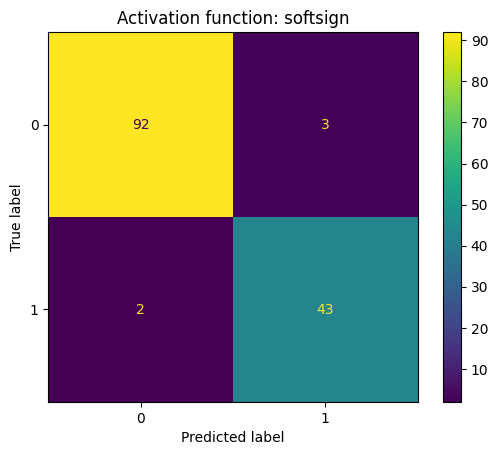

In [25]:
activation_fcns = ["sigmoid", "relu", "softsign"]
for fcn in activation_fcns:
    wandb.init(project='tumor-classification-4', name=f"Activation function:{fcn}, 4 Layer, 10 Nodes")
    model = get_basic_model(count_nodes=10, count_layers=2, activation_fcn=fcn)
    model.fit(X_train, y_train, epochs=15, batch_size=16, verbose=0, validation_data=(X_test, y_test), callbacks=[WandbMetricsLogger()])
    acc = model.get_metrics_result()["accuracy"]

    wandb.finish()
    predictions = model.predict(X_test)
    predictions = np.apply_along_axis(to_bool,axis=1, arr=predictions)
    cm_ens = confusion_matrix(y_true=y_test, y_pred=predictions)
    disp_ens = ConfusionMatrixDisplay(cm_ens)
    disp_ens.plot()
    disp_ens.ax_.set_title(f"Activation function: {fcn}")
